# Load & Inspect the Data

In [1]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Load csv data to dataframe

netflix_df = pd.read_csv('netflix_titles.csv')

In [3]:
# inspect the structure of the dataframe 

print("Shape: ",netflix_df.shape)
print("No of rows: ", netflix_df.shape[0])
print("No of columns: ", netflix_df.shape[1])

Shape:  (8807, 12)
No of rows:  8807
No of columns:  12


In [4]:
# Check the names and datatypes of all columns 

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Check a data sample inside data frame 

netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [6]:
# Check the null values report 

netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Add New Columns 

### Create:
- content_age = current_year - release_year
- is_recent (released ≥ 2018)

In [7]:
# Add the content age column to calculate the number of years passed form the release year of the title 

from datetime import datetime 
current_year = datetime.now().year

netflix_df["content_age"]= current_year - netflix_df["release_year"]

netflix_df[["title","type","release_year","content_age"]].head()

,title,type,release_year,content_age
0,Dick Johnson Is Dead,Movie,2020,6
1,Blood & Water,TV Show,2021,5
2,Ganglands,TV Show,2021,5
3,Jailbirds New Orleans,TV Show,2021,5
4,Kota Factory,TV Show,2021,5


In [8]:
# Add the column to check if the content are recent or not.
# Content after 2018 -> recent. Others -> old 

netflix_df["is_recent"] = netflix_df["release_year"] >= 2018
netflix_df[["title","type", "release_year", "content_age","is_recent"]].head(9)

,title,type,release_year,content_age,is_recent
0,Dick Johnson Is Dead,Movie,2020,6,True
1,Blood & Water,TV Show,2021,5,True
2,Ganglands,TV Show,2021,5,True
3,Jailbirds New Orleans,TV Show,2021,5,True
4,Kota Factory,TV Show,2021,5,True
5,Midnight Mass,TV Show,2021,5,True
6,My Little Pony: A New Generation,Movie,2021,5,True
7,Sankofa,Movie,1993,33,False
8,The Great British Baking Show,TV Show,2021,5,True


# Counting and proportions

In [9]:
# count the number contents by type 
count_by_type = netflix_df["type"].value_counts()
print("Type count by type: ", count_by_type)

# Calcualte the proportion by type 
print("\n\nProportion: ")
print(count_by_type/sum(count_by_type))

Type count by type:  type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Proportion: 
type
Movie      0.696151
TV Show    0.303849
Name: count, dtype: float64


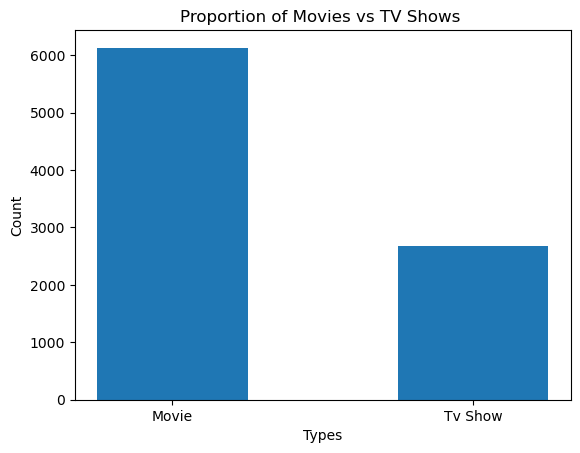

In [10]:
# Plot the proportion by type 

plt.bar(["Movie","Tv Show"], height=count_by_type, width=0.5)
plt.title("Proportion of Movies vs TV Shows ")
plt.xlabel("Types")
plt.ylabel("Count")
plt.show()

# Release Year Summary Statistics

In [11]:
#Statistical summary of release_year

netflix_df["release_year"].agg(["mean","median", "max", "min"])

mean      2014.180198
median    2017.000000
max       2021.000000
min       1925.000000
Name: release_year, dtype: float64

In [12]:
# Stistical summary of release_year data based on type 

netflix_df.groupby("type")["release_year"].agg(["mean","median","max","min"])

,mean,median,max,min
type,,,,
Movie,2013.121514,2016.0,2021,1942
TV Show,2016.605755,2018.0,2021,1925


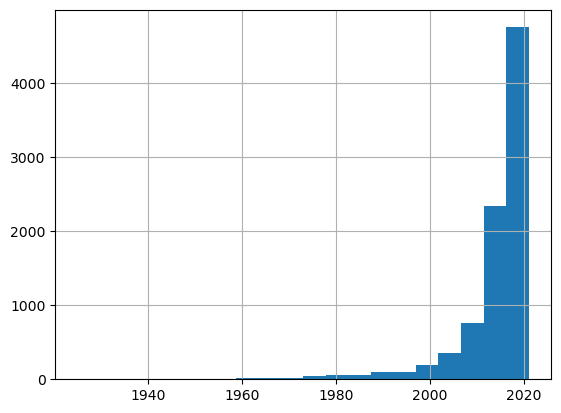

In [13]:
# Plotting the release year of all contents 

netflix_df["release_year"].hist(bins=20)
plt.show()

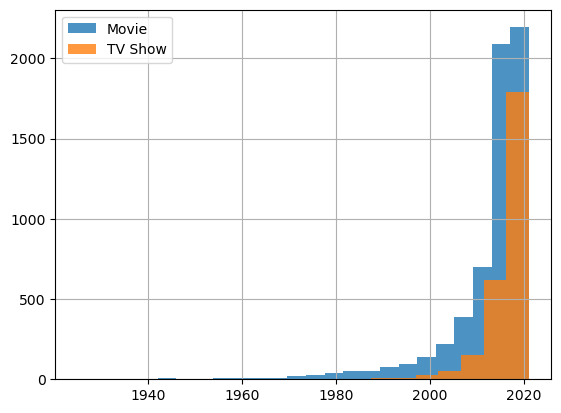

In [14]:
# Plotting the release year of contents by type 

plt.clf()
netflix_df[netflix_df["type"]=="Movie"]["release_year"].hist(bins=20, alpha=0.8)
netflix_df[netflix_df["type"]=="TV Show"]["release_year"].hist(bins=20, alpha=0.8)
plt.legend(["Movie","TV Show"])
plt.show()

In [15]:
netflix_df.groupby("type")["release_year"].agg(["mean", "median"])

,mean,median
type,,
Movie,2013.121514,2016.0
TV Show,2016.605755,2018.0


## Questions: 
- Is Netflix content skewed toward recent years?  
  <b>Answer:</b> The mean of the data and its visulization shows that the data is skewed towards recent year. specialy year after 2017

- Which type is newer on average?  
  <b>Answer:</b> Both mean and median of the data states that TV Shows are newer on avrage than movies. 

# Growth Over Time (Grouping + Cumulative Stats)

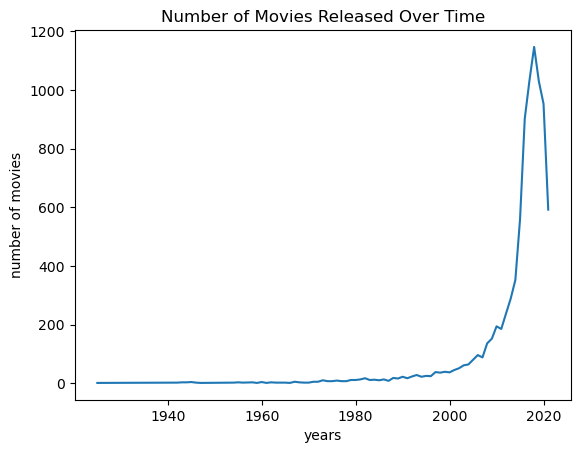

In [16]:
# Titles per release year

movies_by_year = netflix_df.groupby("release_year")["release_year"].size()
movies_by_year.plot(kind="line", xlabel="years", ylabel="number of movies", title="Number of Movies Released Over Time")
plt.show()

## Questions
- When did Netflix’s content grow fastest?  
  <b>Answer:</b> The line chart shows a significant growth after 2005 in the number of released items. 
- How did growth change after 2015?  
  <b>Answer:</b> After 2015 the graph show a sudden decrease in the number of released items. 

# Movies vs TV Shows Trend (Pivot Tables)


In [17]:
netflix_df.pivot_table(values="title", 
                       columns="type", 
                       index="release_year", 
                       aggfunc="count", 
                       fill_value=0, 
                       margins=True, 
                       margins_name="Total")

type,Movie,TV Show,Total
release_year,,,
1925,0,1,1
1942,2,0,2
1943,3,0,3
1944,3,0,3
1945,3,1,4
...,...,...,...
2018,767,380,1147
2019,633,397,1030
2020,517,436,953


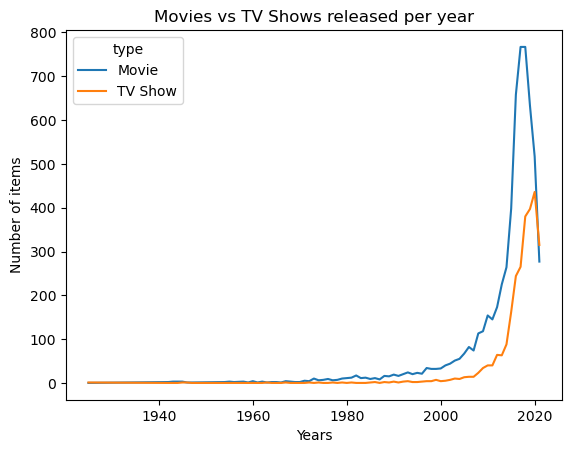

In [18]:
# Movies vs TV Shows released per year
movies_shows_per_year = netflix_df.pivot_table(values="title", 
                                               columns="type", 
                                               index="release_year", 
                                               aggfunc="count", 
                                               fill_value=0)
movies_shows_per_year.plot(kind="line")
plt.xlabel("Years")
plt.ylabel("Number of items")
plt.title("Movies vs TV Shows released per year")
plt.show()

In [19]:
# When did TV Shows start increasing rapidly?

# Are Movies still dominant in recent years?

# Country-Level Analysis

In [20]:
netflix_df.groupby("country")["release_year"].agg(["count","mean"])\
            .sort_values(["count","mean"], ascending=[False, False]).head(10)

,count,mean
country,,
United States,2818,2013.314762
India,972,2011.966049
United Kingdom,419,2015.245823
Japan,245,2014.285714
South Korea,199,2017.130653
Canada,181,2016.408840
Spain,145,2017.951724
France,124,2016.806452
Mexico,110,2016.136364


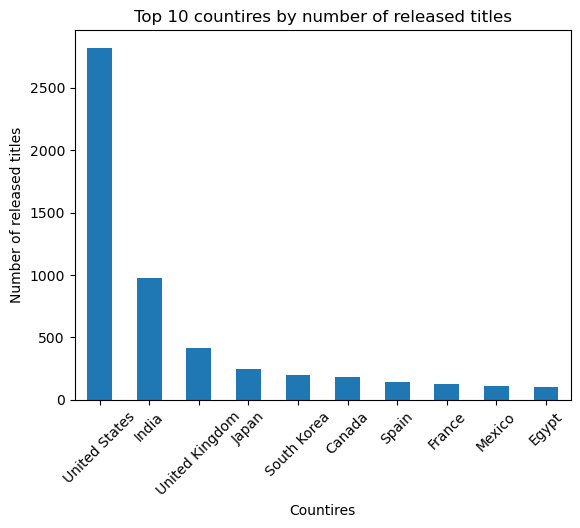

In [21]:
netflix_df.groupby("country")["title"].agg("count")\
        .sort_values(ascending=False).head(10)\
        .plot(kind="bar", 
              xlabel="Countires", 
              ylabel="Number of released titles", 
              title="Top 10 countires by number of released titles", rot=45)

plt.show()

In [22]:
# Mean analysis of movie release_year by country 

netflix_df.groupby("country")["release_year"].agg("mean").sort_values(ascending=False).head(5)


country
Egypt, Denmark, Germany     2021.0
Uruguay, Germany            2021.0
, South Korea               2021.0
Belgium, United Kingdom     2021.0
Mexico, France, Colombia    2021.0
Name: release_year, dtype: float64

## Questions 
 - Which countries contribute most content?  
    <b>Answer</b>: The bar chart above shows top 10 contries by the number of contribution. The top are are US and India.  
 - Do some countries produce newer content?  
   <b>Answer: </b> The analysis above shows titles related to many countries instead of one has a higher mean on release data column.

# Recent Content Analysis (Filtering + Scatter Plot)

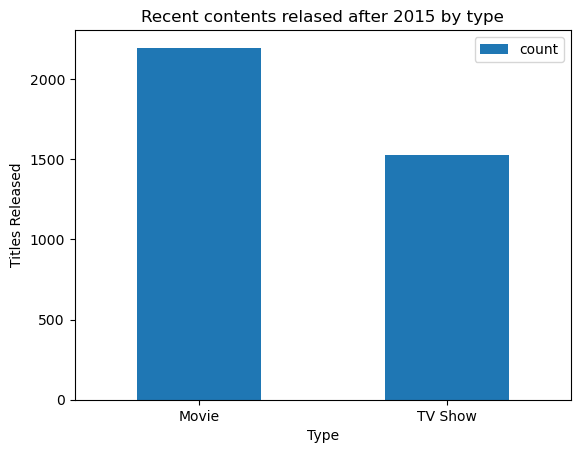

In [23]:
# Recent contents - contents released after 2018
recent_contents = netflix_df[netflix_df["is_recent"] == True]

# Compare recent movies vs recent shows 
recent_contents.groupby("type")["type"].agg(["count"])
recent_contents.groupby("type")["type"].agg(["count"]).plot(kind="bar", 
                                                            title="Recent contents relased after 2015 by type", 
                                                            xlabel="Type", 
                                                            ylabel="Titles Released", rot=0)
plt.show()

In [24]:
# Calculate content age. 
# Content age is to calculate how old is the released title today. 

recent_content_mean_age = recent_contents.groupby("type")["content_age"]\
                            .agg("mean")\
                            .sort_values(ascending=False)
recent_content_mean_age

type
Movie      6.861440
TV Show    6.551047
Name: content_age, dtype: float64

Text(0.5, 1.0, 'Release Year vs Content Age')

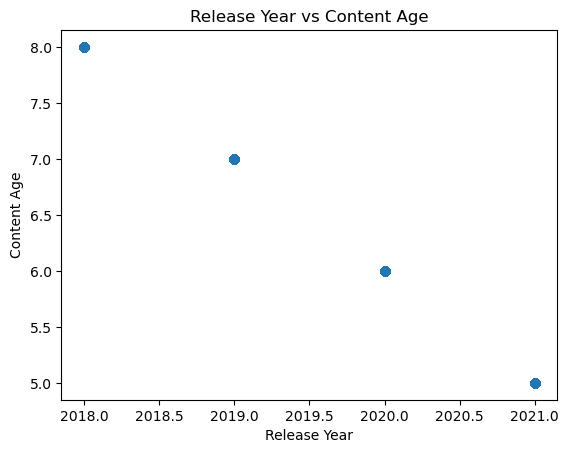

In [25]:
plt.scatter(
    recent_contents["release_year"],
    recent_contents["content_age"]
)
plt.xlabel("Release Year")
plt.ylabel("Content Age")
plt.title("Release Year vs Content Age")

Text(0.5, 1.0, 'Mean Content Age by Content Type')

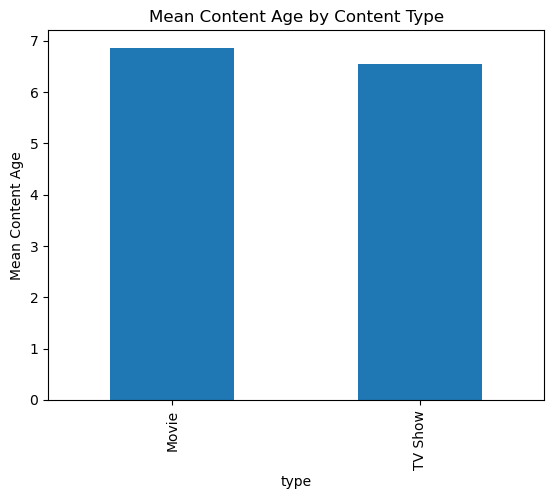

In [26]:
recent_content_mean_age.plot(kind="bar")
plt.ylabel("Mean Content Age")
plt.title("Mean Content Age by Content Type")

# Explicit Indexing & Slicing

In [27]:
netflix_df = netflix_df.set_index("title")

In [28]:
netflix_df.loc["Zubaan"]

show_id                                                     s8807
type                                                        Movie
director                                              Mozez Singh
cast            Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
country                                                     India
date_added                                          March 2, 2019
release_year                                                 2015
rating                                                      TV-14
duration                                                  111 min
listed_in          Dramas, International Movies, Music & Musicals
description     A scrappy but poor boy worms his way into a ty...
content_age                                                    11
is_recent                                                   False
Name: Zubaan, dtype: object

In [29]:
netflix_df.loc[["Zubaan", "Blood & Water"]]

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_age,is_recent
title,,,,,,,,,,,,,
Zubaan,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,11,False
Blood & Water,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",5,True


In [30]:
netflix_df[10:14]

netflix_df.loc[["Confessions of an Invisible Girl", "Bangkok Breaking"]]["cast"]

title
Confessions of an Invisible Girl    Klara Castanho, Lucca Picon, Júlia Gomes, Marc...
Bangkok Breaking                    Sukollawat Kanarot, Sushar Manaying, Pavarit M...
Name: cast, dtype: object

In [31]:
netflix_df = netflix_df.reset_index()

In [32]:
netflix_df.head(2)

,title,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_age,is_recent
0,Dick Johnson Is Dead,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",6,True
1,Blood & Water,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",5,True


# Final Insights & Summary
- Netflix content increased sharply after 2015
- TV Shows have a higher median release year than Movies
- Content is heavily concentrated in a few countries
- Older titles exist but are relatively uncommon